In [120]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.special import ellipj 
from ipywidgets import interact 

In [121]:
#Configure the parameters 


def set_params(x_o, alpha, beta): 
    return {'amplitude': x_o, 'alphaconstant' : alpha, 'damping_coefficient' : beta}


params = set_params(1, 10, 3)


    



In [126]:
def x(params, t, k = 0, gamma =  0): 

    #defining parameters
    x_o = params['amplitude']
    alpha = params['alphaconstant']

    #equation
    
    omega = np.sqrt(2*alpha) - k*gamma
    theta = omega*t
    

    return x_o* np.exp(1j*theta)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


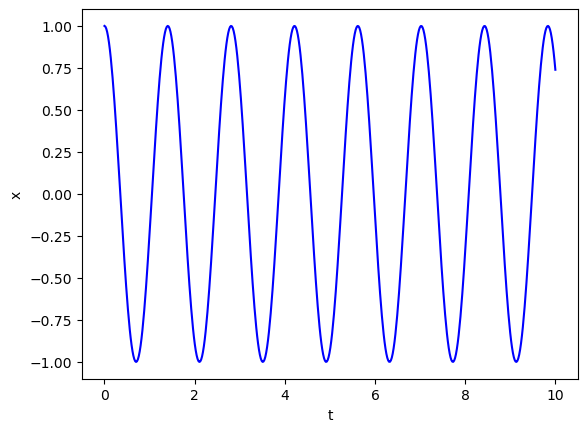

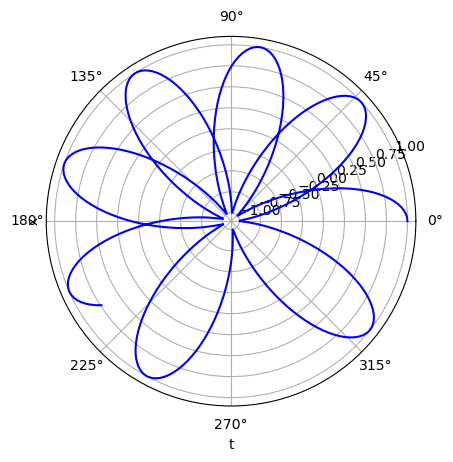

In [129]:
plt.plot(t,x(params,t), color="blue")




plt.xlabel('t'); plt.ylabel('x')

plt.show()


plt.polar(t,x(params,t), color="blue")
plt.xlabel('t'); plt.ylabel('x')

plt.show()


### Damping ODE for Small Angles

In [130]:
  
def x2(x_o, beta, alpha, k= 0 , gamma= 0 ):

    #defining parameters
    x_o = params['amplitude']
    alpha = params['alphaconstant']
    beta = params['damping_coefficient']

    theta = (beta * 1j - np.sqrt(2*alpha - beta**2))*t - k*gamma


    return x_o*np.exp(1j*theta)

In [131]:
plt.plot(t,x2(params, t))
plt.xlabel('t')
plt.ylabel('x')

plt.show()



plt.polar(t,x2(params, t))
plt.xlabel('t')
plt.ylabel('x')
plt.show()


TypeError: x2() missing 1 required positional argument: 'alpha'

### First Elliptic Jacobi Function for wave 

In [97]:


def x_sn(t,omega_val,modulus_k, theta, x_o): 

    #Defining the helper functions for wavefunction and modulus
    
    def omega(x_o,alpha): 
        return np.sqrt(alpha*(2-x_o**2)) 


    def modulus(x_o): 
        return np.sqrt(x_o**2/ (2-x_o**2)) 

    

    omega_val = omega(x_o,alpha)
    modulus_k = modulus(x_o)

    #Defining the sn function 

    u = omega_val*t + theta 
    sn, cn, dn, ph = ellipj(u,modulus_k)
    return x_o*sn